In [1]:
import numpy as np
import matplotlib.pyplot as plt

transcripts = []
with open('transcripts.txt', 'r') as f :
    for line in f :
        transcripts.append(line.strip())
        
reads = []
with open('transcript_reads.txt', 'r') as f :
    for line in f :
        reads.append(line.strip())

transcriptsCount = len(transcripts)
readsCount = len(reads)

rho = np.array([0.2763549, 0.2158966, 0.03822885, 0.06552442, 0.40399523])
rho /= np.sum(rho)

print('Transcripts = ' + str(transcripts))
print('First 5 reads = ' + str(reads[0:5]))
print('(Real) rho = ' + str(rho))

Transcripts = ['ATCTCGACGCACTGC', 'GAGTTCGAACTCTTC', 'AGAGTTCCAGTGTCA', 'AAAGCTCACTGCGGA', 'AGCGATATCAGAGTD']
First 5 reads = ['AGAGT', 'CACTG', 'TCGAA', 'AGCTC', 'ATCTC']
(Real) rho = [0.2763549  0.2158966  0.03822885 0.06552442 0.40399523]


In [2]:
N_iter = 100 # Number of EM iterations

# A: Compatibility matrix. A[i, j] = 1 iff read i aligns to transcript j
A = np.zeros((readsCount, transcriptsCount))

# Naive alignment algorithm with no read errors
for i in range(readsCount) :
    for j in range(transcriptsCount) :
        if reads[i] in transcripts[j] :
            A[i, j] = 1.


# Initialization of rho as uniform
rho_est = (1. / float(transcriptsCount)) * np.ones(transcriptsCount)

# ==============================================================================

# For each EM iteration, store the Sum-of-squares error w.r.t the true rho in this vector
sse_per_iteration = np.ones(N_iter) * np.inf

# Problem 1.1
# The EM algorithm to estimate the transcript abundance of rho (which we pretend is unknown to us)
# Save your final, updated estimates in rho_est
rowsSum = A.sum(axis = 1)
f = A / rowsSum[:, None]

for i in range(N_iter):
    # Maximization step
    rowsSum = f.sum(axis = 1)
    f /= rowsSum[:, None]
    rho_est = f.sum(axis=0)
    rho_est /= np.sum(rho_est)
    
    # Expectation step
    f = A * rho_est
    rowsSum = f.sum(axis = 1)
    f /= rowsSum[:, None]
    sse_per_iteration[i] = sum((rho - rho_est) ** 2) 


# ==============================================================================

print('(Real) rho = ' + str(rho))
print('(Est.) rho = ' + str(rho_est))

print('Final SSE = ' + str(round(sse_per_iteration[-1], 6)))


(Real) rho = [0.2763549  0.2158966  0.03822885 0.06552442 0.40399523]
(Est.) rho = [0.27817568 0.19989501 0.03950012 0.07982432 0.40260487]
Final SSE = 0.000467


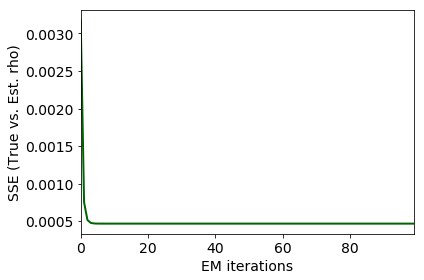

In [3]:
# Run this cell to get a plot of the Sum-of-square error between the true rho and your EM estimate

f = plt.figure(figsize=(6, 4))

plt.plot(np.arange(N_iter), sse_per_iteration, linewidth=2, c='darkgreen')

plt.xlabel('EM iterations', fontsize=14)
plt.ylabel('SSE (True vs. Est. rho)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(0, N_iter - 1)

plt.tight_layout()
plt.show()
